# Project

Let's try to compute the area of a bacterial colony on a petri dish.

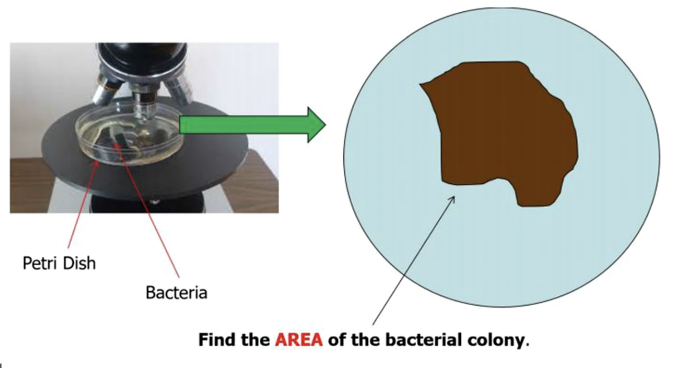

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from shapely import Polygon, Point, points

Next, we provide the bacterial colony as a polygon. You can as much precision you want

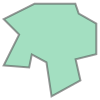

In [4]:
## Approximation of the bacterial colony
coords = (
    (2, 2),
    (3, 4),
    (2, 5),
    (4, 6),
    (6.64, 6),
    (6.86, 5.36),
    (8.0, 4.71),
    (8.0, 2.73),
    (6.66, 2.40),
    (6.97, 1.03),
    (5.10, 0.00),
    (4.77, 2.20),
    (3.82, 2.71),
    (3.65, 1.87),
    (2, 2)
)
bacteria_poly = Polygon(coords)  # Create polygon
bacteria_poly

Let's compute the minimum and maximum of the coordinates.

In [9]:
x_coords, y_coords = bacteria_poly.exterior.xy  # x and y coordinates as an array
x_max = max(x_coords)
x_min = min(x_coords)
y_max = max(y_coords)
y_min = min(y_coords)
print(f"x-axis between {x_min} and {x_max}")
print(f"y-axis between {y_min} and {y_max}")

x-axis between 2.0 and 8.0
y-axis between 0.0 and 6.0


Now, we need to create the Petri Dish, this will act as the box in the previous example. Here, the radious of the petri dish is $r = 5$ and its center $(P_x, P_y) = (5, 3)$.

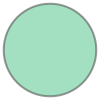

In [10]:
petri_radius = 5
petri_center = (5, 3)
petri_dish = Point(*petri_center).buffer(petri_radius)
petri_dish

Plot everything together

/tmp/ipykernel_40685/643887479.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


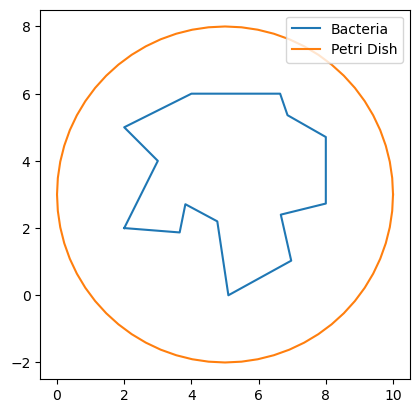

In [24]:
fig, ax = plt.subplots()
ax.plot(*bacteria_poly.exterior.xy, label="Bacteria")
ax.plot(*petri_dish.exterior.xy, label="Petri Dish")
ax.legend(loc="upper right")
ax.set_aspect("equal")
fig.show()

Now, in order to follow a Monte Carlo approach we need to simulate $n$ random points inside the petri dish. For that, an easy way is to use polar coordinates. Simulate $n$ random numbers between $0$ and the radious $r$, and also $n$ random angles $\theta$ between $0$ and $2 \pi$.

In [15]:
n = 100
# Polar coordinates
r_array_rndm = np.random.uniform(0, petri_radius, size=n)
theta_array_rndm = np.random.uniform(0, 2 * np.pi, size=n)

We have simulated pairs $(r_i, \theta_i)$ for $i=1, \ldots, n$. Then, for getting points inside the petri dish we need to get back to cartesian coordinates and then shift them.

$$
\begin{aligned}
x_i &= P_x + r_i \cos(\theta_i) \\
y_i &= P_y + r_i \sin(\theta_i)
\end{aligned}
$$

In [ ]:
# Cartesian coordinates
x_array_rndm = petri_center[0] + r_array_rndm * np.cos(theta_array_rndm)
y_array_rndm = petri_center[1] + r_array_rndm * np.sin(theta_array_rndm)

Now let's plot these points and the petri dish.

(np.float64(-0.5), np.float64(10.5), np.float64(-2.5), np.float64(8.5))

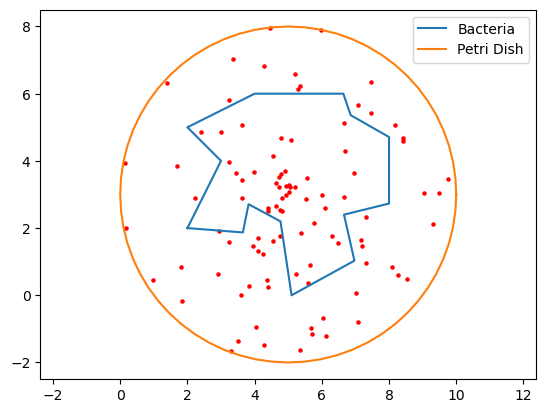

In [16]:
fig, ax = plt.subplots()
ax.plot(*bacteria_poly.exterior.xy, label="Bacteria")
ax.plot(*petri_dish.exterior.xy, label="Petri Dish")
ax.scatter(x_array_rndm, y_array_rndm, c="red", s=5)
ax.legend()
ax.axis('equal')


The package `shapely` includes a functionality (method) for its polygons to check if a point is contained within this polygon. For example, we know the point $(0, 0)$ is not inside the bacteria polygon.

In [25]:
bacteria_poly.contains(Point(0, 0))

False

Now let's see we can do that automatically for each point.

In [17]:
points_rndm = points(x_array_rndm, y_array_rndm)
mask = np.array([bacteria_poly.contains(point) for point in points_rndm])

And now we can plot the points with different markers

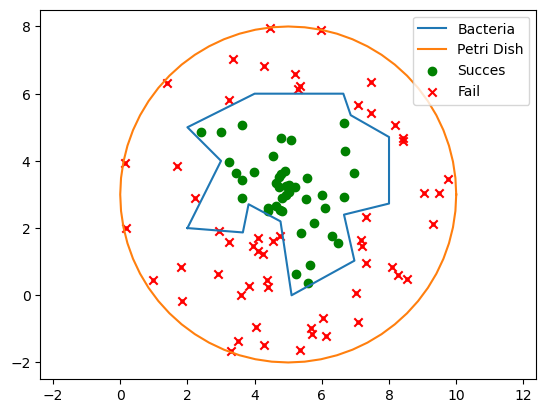

In [18]:
fig, ax = plt.subplots()
ax.plot(*bacteria_poly.exterior.xy, label="Bacteria")
ax.plot(*petri_dish.exterior.xy, label="Petri Dish")
ax.scatter(x_array_rndm, y_array_rndm, c="red", s=5)
ax.scatter(x_array_rndm[mask], y_array_rndm[mask], color="green", label="Succes") 
ax.scatter(x_array_rndm[~mask], y_array_rndm[~mask], color="red", marker="x", label="Fail")
ax.legend()
ax.axis('equal')
plt.show()

And finally

In [19]:
counter = mask.sum()
bacteria_area_estimation = counter / n * np.pi * petri_radius ** 2
print(f"The estimation of the area of the bacteria is {bacteria_area_estimation:.2f} square units.")

The estimation of the area of the bacteria is 33.77 square units.
